In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = [15, 7]

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to import all citation data
citations = '''
  select * from [dbo].[spd_PDCitations$]  
  '''
citations = pd.read_sql(citations, connection)
connection.close()

#filter for only citations indicative of vehicle accidents

vehicular_accidents = citations.loc[citations['Charge Description'].str.contains(
    'Failure to Control Speed to Avoid A Collision')]

vehicular_accidents.head()

tcmainid  Citation # Citation Date  Citation Time Arizona Statute Code  \
2    621806.0   2056700.0    2018-06-23         1053.0              28-701A   
62   593393.0   2016624.0    2017-10-26          756.0              28-701A   
130  593482.0   2048126.0    2017-10-26         1702.0              28-701A   
133  593500.0   2046886.0    2017-10-26         1643.0              28-701A   
292  591049.0   2045907.0    2017-10-07         1334.0              28-701A   

                                Charge Description Citation Type Code  \
2    Failure to Control Speed to Avoid A Collision                 CV   
62   Failure to Control Speed to Avoid A Collision                 CV   
130  Failure to Control Speed to Avoid A Collision                 CV   
133  Failure to Control Speed to Avoid A Collision                 CV   
292  Failure to Control Speed to Avoid A Collision                 CV   

    Citation Type Description  Officer Badge # Street Number  \
2               Civil Traffic           1360.0           xxx   
62              Civil Traffic           1405.0          8xxx   
130             Civil Traffic            650.0          4xxx   
133             Civil Traffic           1326.0          1xxx   
292             Civil Traffic           1390.0           xxx   

             ...           State      Zip District  Beat    Zone  \
2            ...              AZ      NaN       D3  10.0  2501.0   
62           ...              AZ      NaN       D1   2.0   712.0   
130          ...              AZ  85251.0       D2   5.0  1109.0   
133          ...              AZ      NaN       D4  15.0  3401.0   
292          ...              AZ      NaN       D4  15.0  3401.0   

         Cited Person  Cited Person Age Cited Person Race  Cited Person Sex  \
2    Glasscock, James              60.0                 W                 M   
62       Garcia, Wade              48.0                 W                 M   
130      Bates, Diane              61.0                 W                 F   
133  Schlitzer, Maddy              23.0                 W                 F   
292   Daoust, Michael              25.0                 W                 M   

    Cited Person Ethnicity  
2                        N  
62                       H  
130                      N  
133                      N  
292                      N  

[5 rows x 22 columns]

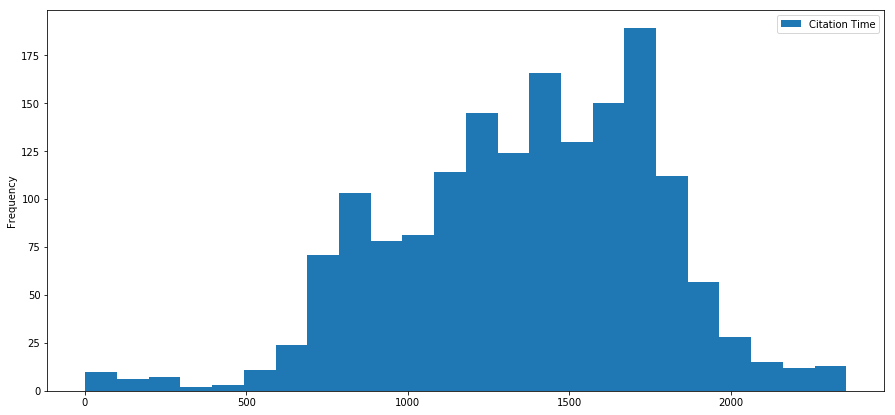

In [10]:
vehicular_accidents.plot(y='Citation Time', kind='hist', bins=24)

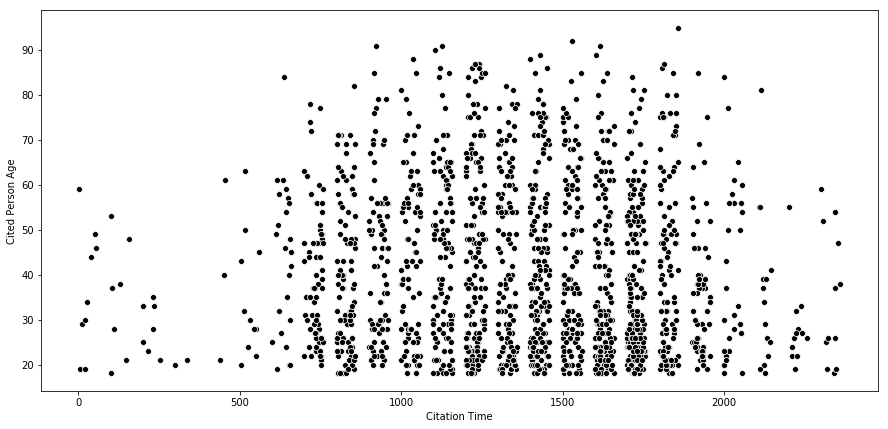

In [53]:
sns.scatterplot(x=vehicular_accidents['Citation Time'], 
                y=vehicular_accidents['Cited Person Age'], color='black')

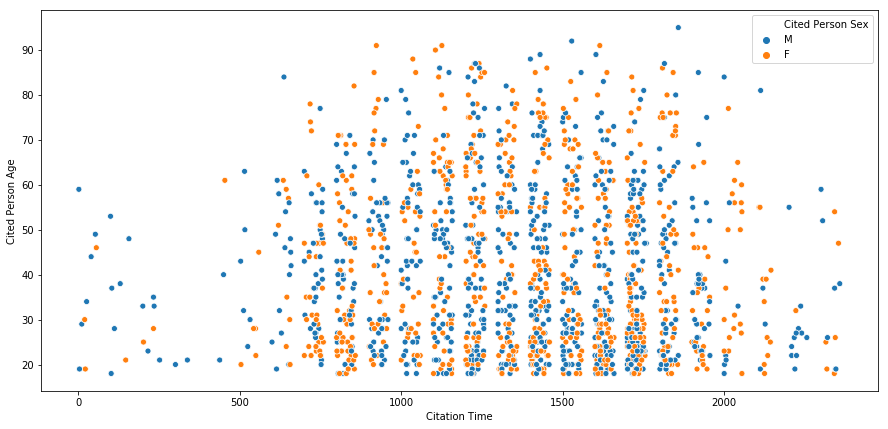

In [48]:
sns.scatterplot(x=vehicular_accidents['Citation Time'], 
                y=vehicular_accidents['Cited Person Age'], 
                hue=vehicular_accidents['Cited Person Sex'])

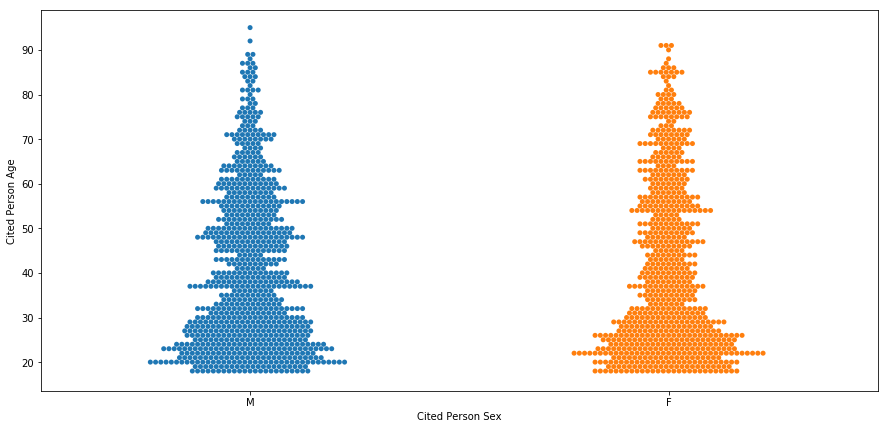

In [59]:
sns.swarmplot(x=vehicular_accidents['Cited Person Sex'], 
                y=vehicular_accidents['Cited Person Age'])

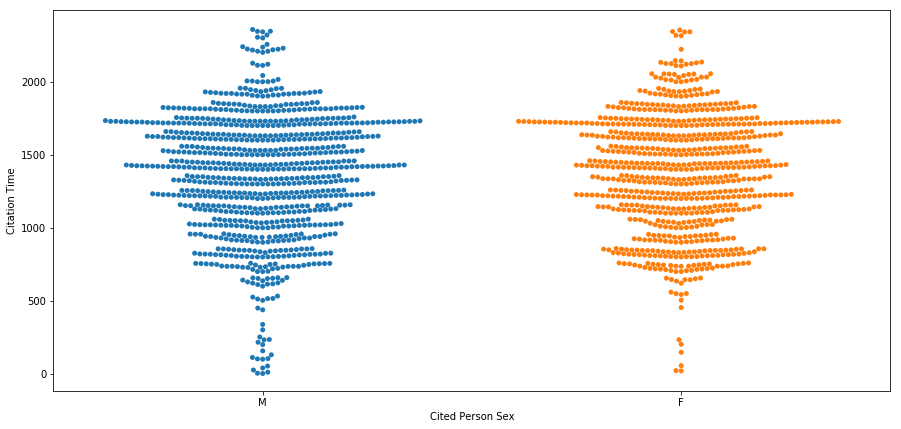

In [5]:
sns.swarmplot(x=vehicular_accidents['Cited Person Sex'], 
                y=vehicular_accidents['Citation Time'])

In [43]:
searchfor = [
    'Fail to Obey Traffic Control Device',
    'Fail to Stop at Stop Sign',
    'Fail to Stop For Red Signal']

fail_to_obey = citations[citations['Charge Description'].str.contains('|'.join(searchfor))]
# fail_to_obey

# x = fail_to_obey.groupby(['Charge Description'])['Charge Description'].count()
# x

Charge Description
Fail to Obey Traffic Control Device    1192
Fail to Stop For Red Signal             982
Fail to Stop at Stop Sign              1125
Name: Charge Description, dtype: int64

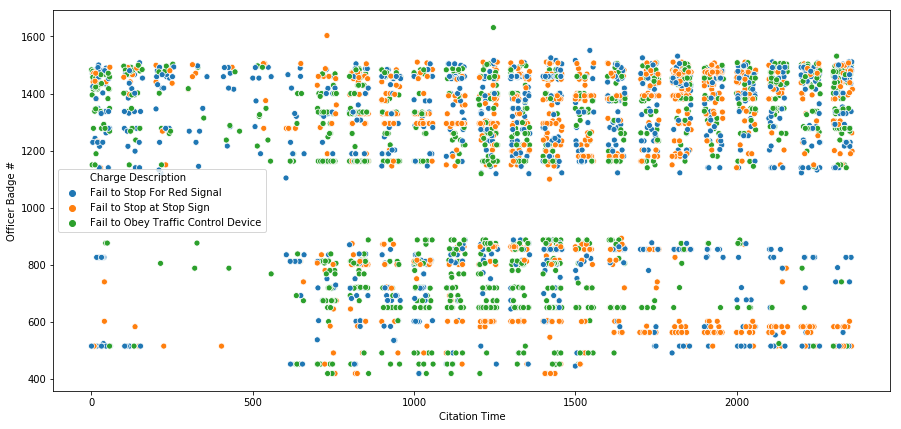

In [44]:
sns.scatterplot(x=fail_to_obey['Citation Time'], 
                y=fail_to_obey['Officer Badge #'], 
                hue=fail_to_obey['Charge Description'])
